In [55]:
import pandas as pd
import numpy as np
import math
from numpy import mean
import matplotlib.pyplot as plt

In [56]:
# from google.colab import drive
# drive.mount('/content/drive')


In [57]:
df = pd.read_csv(r'C:\Users\caio.guedes_libercap\Documents\Dev\CESAR\Módulo 1\Estatística Descritiva\Projeto analise de credito\dataset\Case_Data.csv')

In [58]:
df.head(3)

,Row ID,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
0,1.0,60516983,64537751,20000,20000,36 months,12.29,667.06,C,C1,...,INDIVIDUAL,NaN,NaN,0,0,52303,41000,NaN,1.0,0.0
1,2.0,60187139,64163931,11000,11000,36 months,12.69,369.00,C,C2,...,INDIVIDUAL,NaN,NaN,0,332,175731,13100,NaN,1.0,0.0
2,3.0,60356453,64333218,7000,7000,36 months,9.99,225.84,B,B3,...,INDIVIDUAL,NaN,NaN,0,0,202012,16300,NaN,1.0,0.0


In [59]:
cols = ['Row ID', 'id', 'funded_amnt', 'purpose', 'next_pymnt_d', 'collections_12_mths_ex_med', 'Unnamed: 50', '36months', '60months']
df.drop(columns=cols, inplace=True)

In [60]:
df['emp_length'].fillna('0', inplace=True)
df['term'] = df['term'].apply(lambda x: x.replace('months', ''))
df['term'] = df['term'].astype(int)
df['emp_length'] = df['emp_length'].apply(lambda x: x.replace('years', '').replace('< ','<').replace('year', '').strip())

In [61]:
df_limpo = df.copy(deep=True)

## Análise de Crédito - Apresentação dos Dados

**Data Dictionary**

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| member_id | ID do Solicitante do Empréstimo		|  		                                 |
| load_amnt   | Valor concedido do Empréstimo           | 			                         |
| term      | Meses para pagamento                      |  meses: 36 ou 60                               |
| int_rate      | Taxa de juros                         |                                                |
| installment    | Valor que o cliente deve por atrasos | 		                                 |
| grade    | Classe do cliente				|                                                |
| sub_grade   | Subclasse do cliente                    |                                                |
| emp_title     | O cargo ocupado pelo cliente          |                                                |
| emp_length    | O tempo em que o cliente está empregado |                                               |
| home_ownership | Se o cliente possui casas registradas | MORTGAGE = Hipotecada, RENT = Alugada, OWN = Própria |
| anual_inc | Renda anual do cliente                    |  		                                 |
| verification_status   | Indica se a renda informada foi verificada | Source Verified = Verificada na Fonte, Verified = Verificada, Not Verified = Não verificada |
| issue_d      | O mês que o empréstimo foi solicitado  |                                                |
| loan_status     | Status do empréstimo                | Current = Corrente, Charged Off = Descartado 	 |
| title    | Finalidade do empréstimo			|                                                |
| dti    | A razão dívida / rendimento 			|                                                |
|	 | (O quanto o mutuário deve todos os meses pelo rendimento do mutuário todos os meses) |        |
| delinq_2yrs   | Nº de parcelas atrasadas nos últimos 2 anos |                                          |   
| early_cr_line   | O mês/ano em que a linha de crédito foi aberta |                                     |  
| inq_last_6mths    | Consultas sobre empréstimos feitos nos últimos 6 meses  |                          |
| mths_since_last_delinq | Meses com atraso das parcelas | 						 |
| open_acc | Nº de linhas de crédito abertas             | 		                                 |
| pub_rec   | Número de registros públicos depreciativos | 				                 |
| revol_bal | Saldo rotativo de crédito total            |                                               |
| revol_util | Taxa de utilização da linha rotativa      |                                               |
| total_acc    | Nº total de linhas de crédito do cliente |                                              |
| inicial_list_status | O status de listagem inicial do empréstimo | W = inteiro, F = fracionário        |
| out_prncp   | Principal pendente restante para o valor total financiado |                              |   
| total_pymnt     | Pagamentos recebidos pelo valor total financiado. |                                  |
| total_rec_prncp | Valor recebido		        |                                                |   
| total_rec_int | Juros recebidos até o momento         | 						 |
| total_rec_late_fee | Taxas atrasadas recebidas 	| 			                         |  
| recoveries | Total de procedimentos de recuperação iniciados contra o mutuário | 			 |
| collection_recovery_fee | As taxas cobradas durante os procedimentos de recuperação |                  |
| last_pymnt_d | O último mês em que o pagamento foi recebido |                                          |
|	      | (Meses desde a inadimplência de 90 dias mais recente ou classificação pior)		 |
| last_pymnt_amnt | O último valor do pagamento recebido |                                               |
| next_pymnt_d | Próxima data de pagamento agendada	|                                                |
| last_credit_pull_d | O mês mais recente que LC retirou crédito para este empréstimo |                  |  
| mths_since_last_major_derog | Meses desde a inadimplência de 90 dias |                                 |  
| application_type | Indica o tipo do pedido		| INDIVIDUAL = Individual, JOINT = Conjunto      |   
| anual_inc_joint | A renda anual combinada fornecida por co-mutuários | 				 |    
| dti_joint | Índice do total de pagamentos mensais dos co-mutuários sobre o total das obrigações da dívida  |
|	    | (Excluindo hipotecas e o empréstimo em ML solicitado, dividido pela renda mensal combinada declarada pelos co-mutuários) |
| acc_now_delinq | O número de contas nas quais o mutuário está inadimplente | 				 |
| tot_coll_amt | Valores totais de cobrança já devidos pelo mutuário | 				 	 |
| tot_cur_bal | Saldo atual total de todas as contas do mutuário | 					 |
| total_rev_hi_lim | Total de crédito alto/limite de crédito | 						 |

### Probabilidade Simples

#### Qual a probabilidade do solicitante do empréstimo ter casa própria?

- Mortgage = Financiado
- Rent = Alugado
- Own = Casa própria
- Any = Outros

In [62]:
casa_propria = len(df_limpo[df_limpo['home_ownership'] == 'OWN'])
probabilidade_casa_propria = casa_propria/len(df_limpo)
probabilidade_casa_propria

print(f'A probabilidade do solicitante ter casa própria é de {round(probabilidade_casa_propria*100,2)}%')

A probabilidade do solicitante ter casa própria é de 11.05%


### Probabilidade Condicional
#### Qual a probabilidade de um inadimplente solicitar empréstimo para pagar o cartão de crédito?

`Usaremos o cálculo de probabilidade condicional para este caso`

$ P(A∣B) = P(A∩B)/P(B) $​
, onde:
- P(A): Prob. de solicitar empréstimo para pagar o cartão de crédito
- P(B): Prob. de possuir inadimplência
- P(A∩B): Número de pessoas inadimplentes que solicitaram empréstimos para pagar o cartão de crédito

In [63]:
#df_inadimplentes = df_limpo[(df_limpo['acc_now_delinq'] > 1) & (df_limpo['title'] == 'Credit card refinancing')]
inadimplentes = len(df_limpo[df_limpo['acc_now_delinq'] > 0])
inadimplentes_emp_para_pagar_cc = len(df_limpo[(df_limpo['title'] == 'Credit card refinancing') & (df_limpo['acc_now_delinq'] > 0)])
prob_inadimplentes = inadimplentes/len(df_limpo)
prob_inadimplentes_emp_para_pagar_cc = inadimplentes_emp_para_pagar_cc/len(df_limpo)

probabilidade_condicional = prob_inadimplentes_emp_para_pagar_cc/prob_inadimplentes

print(f'A probabilidade de um inadimplente solicitar empréstimo para pagar o cartão de crédito é de {round(probabilidade_condicional,2)}%')

A probabilidade de um inadimplente solicitar empréstimo para pagar o cartão de crédito é de 0.2%


### Probabilidade da União
#### Ter casa própria OU estar empregado a 10 ou mais anos

In [64]:
bom_credito = len(df_limpo[df_limpo['home_ownership'] == 'OWN']) | len(df_limpo[df_limpo['emp_length'] == '10+'])
pBom_credito = bom_credito / len(df_limpo)

print(f'A probabilidade do solicitante ter casa própria ou de estar empregado a 10 ou mais anos é de {round(pBom_credito*100,2)}%')

A probabilidade do solicitante ter casa própria ou de estar empregado a 10 ou mais anos é de 41.83%


### Probabilidade da Intersecção
#### Ter casa própria E estar empregado há 10 ou mais anos

In [65]:
bom_credito = len(df_limpo[df_limpo['home_ownership'] == 'OWN']) & len(df_limpo[df_limpo['emp_length'] == '10+'])
pBom_credito = bom_credito / len(df_limpo)

print(f'A probabilidade do solicitante ter casa própria e de estar empregado a 10 ou mais anos é de {round(pBom_credito*100,2)}%')

A probabilidade do solicitante ter casa própria e de estar empregado a 10 ou mais anos é de 2.97%


### Teorema de Bayes

#### Qual a probabilidade de um adimplente solicitar empréstimo sem comprometer a sua renda mensal em mais de 35%  ?
OBS: Regra do banco é não conceder empréstimo se seus compromissos mensais superarem o percentual de 35% sobre sua renda.

P(A|B) = P(B|A) x P(A) / P(B)

P(A) = Probabilidade de um adimplente solicitar empréstimo (prob_adimplentes);

P(B) = Probabilidade de não comprometer sua renda mensal em mais de 35% (prob_renda);

P(A|B) = Probabilidade de solicitar o empréstimo, tal que não comprometa
a renda mensal em mais de 35% (prob_adimplente_renda);

P(B|A) = Probabilidade de não comprometer a renda mensal em mais de 35%, tal que possibilite o empréstimo (prob_renda_adimplente).


In [66]:
inadimplentes = len(df_limpo[df_limpo['acc_now_delinq'] > 0])
prob_inadimplentes = inadimplentes/len(df_limpo)
prob_adimplentes = 1 - prob_inadimplentes #P(A)
compromisso_renda_anterior = df_limpo['dti']
compromisso_renda_emprestimo = (df_limpo['installment'] / (df_limpo['annual_inc'] / 12))*100
df_limpo['compromisso_renda_total'] = compromisso_renda_anterior + compromisso_renda_emprestimo
cont = 0
for valor in df_limpo['compromisso_renda_total'] :
  if valor <= 35 :
    cont += 1
prob_renda = (cont / len(df_limpo))*100 #P(B)
renda_adimplente = len(df_limpo[df_limpo['compromisso_renda_total'] <= 35 ]) & len(df_limpo[df_limpo['acc_now_delinq'] == 0])
prob_renda_adimplente = (renda_adimplente / len(df_limpo))*100 #P(B|A)
prob_adimplente_renda = (prob_renda_adimplente * prob_adimplentes) / prob_renda #P(A|B) = (P(B|A) x P(A)) / P(B)
print(f'A probabilidade de um candidato adimplente solicitar um empréstimo, tal que não comprometa sua renda mensal em mais de 35%, é de {round(prob_adimplente_renda*100,2)}%')

A probabilidade de um candidato adimplente solicitar um empréstimo, tal que não comprometa sua renda mensal em mais de 35%, é de 89.42%


### Variáveis Aleatórias

Uma variável aleatória (VA) é uma função que associa um valor numérico a cada resultado possível de um experimento aleatório. No contexto da análise de crédito, a inadimplência pode ser considerada uma VA, pois seu valor depende do comportamento dos clientes, como, por exemplo, se eles pagam ou não suas contas.

A inadimplência pode ser modelada como uma VA discreta, onde cada cliente pode contribuir com um número contável de valores possíveis. No dataset, o cliente contribui com um valor para essa VA com base em seu histórico de pagamentos.

Vamos fazer a análise verificando a probabilidade de Inadimplência.

Variável Aleatória = Inadimplência (acc_now_delinq)

acc_now_delinq = Número de contas nas quais o mutuário está inadimplente

Obtemos a distribuição do número de clientes, por evento de conta indadimplente.

### Função Probabilidade

In [67]:
#Distribuição
df_limpo['acc_now_delinq'].value_counts(sort=False).sort_index()

acc_now_delinq
0    211858
1      1076
2        57
3         5
4         2
5         1
Name: count, dtype: int64

In [68]:
#Probabilidade da Inadimplência
func_prob = df_limpo['acc_now_delinq'].value_counts(sort=False).sort_index() / df_limpo['acc_now_delinq'].count()
print(func_prob)

acc_now_delinq
0    0.994643
1    0.005052
2    0.000268
3    0.000023
4    0.000009
5    0.000005
Name: count, dtype: float64


### Função Repartição (Função Cumulativa)

In [69]:
func_prob.cumsum()

acc_now_delinq
0    0.994643
1    0.999695
2    0.999962
3    0.999986
4    0.999995
5    1.000000
Name: count, dtype: float64

Text(0.5, 1.0, 'Gráfico ')

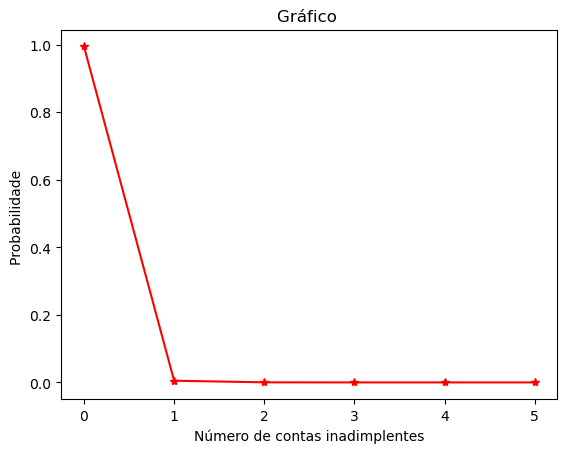

In [70]:
plt.plot(func_prob, 'r*-')
plt.xlabel('Número de contas inadimplentes')
plt.ylabel('Probabilidade ')
plt.title('Gráfico ')

Text(0.5, 1.0, 'Gráfico Acumulado ')

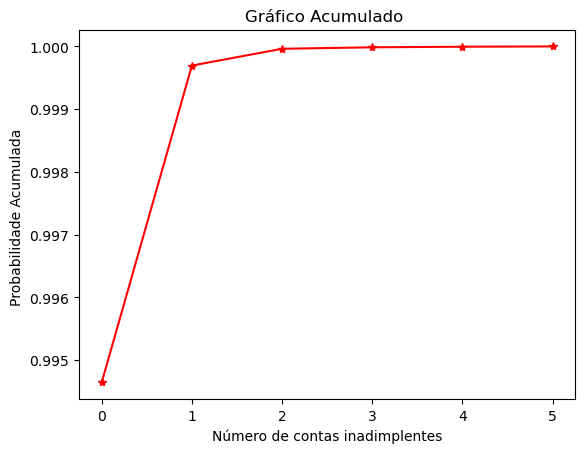

In [71]:
grafico=func_prob.cumsum()
plt.plot(grafico, 'r*-')
plt.xlabel('Número de contas inadimplentes')
plt.ylabel('Probabilidade Acumulada ')
plt.title('Gráfico Acumulado ')

### Esperança Matemática
O Valor Esperado que será calculado é em relação ao número de contas abertas 'open_acc'

In [72]:
freq = df_limpo['open_acc'].value_counts()
pct = (df_limpo['open_acc'].value_counts(normalize = True) * 100).round(2)
df_val_esp = pd.DataFrame({'Freq': freq, 'Prob %': pct}).reset_index()
df_val_esp['V_Esp'] = df_val_esp['open_acc'] * df_val_esp['Prob %']
df_val_esp = df_val_esp.sort_values('open_acc')
df_val_esp

,open_acc,Freq,Prob %,V_Esp
38,1,50,0.02,0.02
27,2,514,0.24,0.48
19,3,2166,1.02,3.06
14,4,5450,2.56,10.24
10,5,9264,4.35,21.75
...,...,...,...,...
58,66,1,0.00,0.00
55,67,1,0.00,0.00
59,68,1,0.00,0.00
61,70,1,0.00,0.00


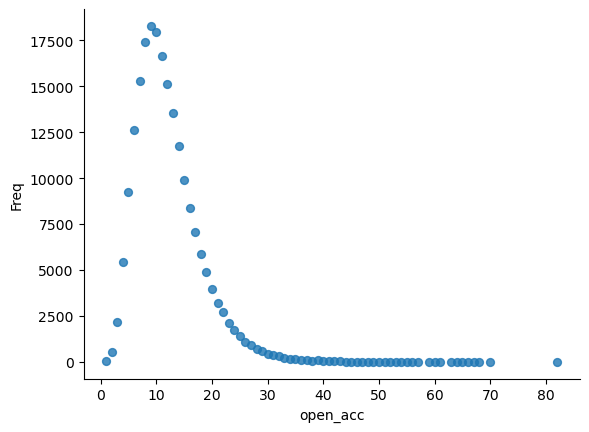

In [73]:
# @title open_acc vs Freq

df_val_esp.plot(kind='scatter', x='open_acc', y='Freq', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

O valor esperado E(x) = x1 * p(x1) + ... + xn * p(xn), onde x = Nº de contas abertas e p(x) = Probababilidade de ter usuários com a respectiva quantidade de contas abertas

In [74]:
Ex = df_val_esp['V_Esp'].sum().round(2)
print(f'O Valor Esperado E(x) = {Ex}')

O Valor Esperado E(x) = 1195.67


### Medidas de tendência central

Análise da distribuição do tempo de emprego dos inadimplentes

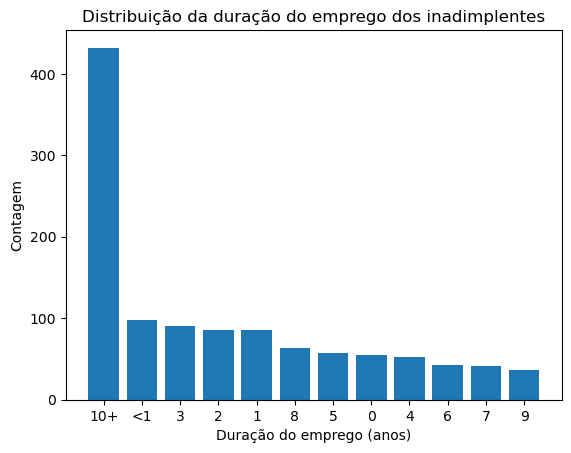

emp_length
10+    432
<1      98
3       90
2       86
1       85
8       63
5       57
0       55
4       53
6       43
7       42
9       37
Name: count, dtype: int64

In [75]:
df_inadimplentes = df_limpo[df_limpo['acc_now_delinq'] > 0]
contagem_emp_length = df_inadimplentes['emp_length'].value_counts()

plt.bar(contagem_emp_length.index, contagem_emp_length.values)
plt.title('Distribuição da duração do emprego dos inadimplentes')
plt.xlabel('Duração do emprego (anos)')
plt.ylabel('Contagem')
plt.show()
display(contagem_emp_length)

Tendo tais dados em vista, podemos verificar as medidas de tendência central para este conjunto de dados, sendo:
- Média (agrupamento dos valores dividido pela contagem)
- Mediana (valor que divide a distribuição em duas partes iguais)
- Moda (valor de maior ocorrência)

Média



In [76]:
df_contagem = pd.DataFrame(contagem_emp_length).reset_index()
df_contagem['emp_length'] = df_contagem['emp_length'].apply(lambda x: x.replace('+','').replace('<',''))
df_contagem['emp_length'] = df_contagem['emp_length'].astype(int)
df_contagem['emp_length x count'] = df_contagem['emp_length'] * df_contagem['count']
df_contagem

numerador = df_contagem['emp_length x count'].sum()
denominador = df_contagem['count'].sum()
media = numerador/denominador

print(f'A média de tempo de emprego entre os inadimplentes é de {round(media,1)} anos')    

A média de tempo de emprego entre os inadimplentes é de 6.0 anos


Mediana
- Analisando o conjunto de dados, temos:

In [77]:
contagem_emp_length

emp_length
10+    432
<1      98
3       90
2       86
1       85
8       63
5       57
0       55
4       53
6       43
7       42
9       37
Name: count, dtype: int64

- Precisamos, então, distribuir os dados para obter o valor central e saber qual a mediana

In [78]:
contagem = 0
dados = list(contagem_emp_length.values)

for i in range(10):
    #Cria uma lista que contém o valor de i repetido N vezes. Por exemplo, se i for 3 e dados[i] for 90, será criada uma lista com o valor 3 repetido 90 vezes
    contagem = [i] * dados[i]
mediana = np.median(contagem)

print(f'A mediana de tempo de emprego entre os inadimplentes é de {mediana} anos')


A mediana de tempo de emprego entre os inadimplentes é de 9.0 anos


Moda
- Como a moda é o valor que mais se repete no conjunto de dados e, de acordo com o value_counts, temos 432 ocorrências de 10+, então a moda é 10+

### Covariância
Como sabemos, a covariância é uma medida matemática que nos dá a possibilidade de comparar o comportamento de dois números, ou grupos de números.

Estamos tentando relacionar a renda anual declarada pelo mutuário com sua inadimplência

Renda anual = annual_inc

Número de contas inadimplentes do mutuário = acc_now_delinq

Como os valores deram negativo e positivo, temos a indicação de que os dois valores se movem em direções opostas, o que faz sentido, pois é de se esperar que quanto maior a renda, menor a inadimplência.

In [79]:
df_limpo[['annual_inc', 'int_rate']].cov()

,annual_inc,int_rate
annual_inc,6.704440e+09,-29376.050244
int_rate,-2.937605e+04,18.057101


### Correlação
A correlação próxima a zero (-0,0844) nos indica uma fraca correlação entre as variáveis.

In [80]:
df_limpo[['annual_inc', 'int_rate']].corr()

,annual_inc,int_rate
annual_inc,1.000000,-0.084428
int_rate,-0.084428,1.000000


Se tentarmos verificar com outras duas variáveis.
Renda anual e valor do empréstimo.
Nesse caso, verificamos a covariância com sinal positivo, indicando que as grandezas se movem juntas.

In [81]:
df_limpo[['annual_inc', 'loan_amnt']].cov()

,annual_inc,loan_amnt
annual_inc,6.704440e+09,1.952529e+08
loan_amnt,1.952529e+08,7.416161e+07


A correlação nesse caso (0,28) fica compreendida entre 0,00 e 0,30, o que indica uma correlação um pouco melhor do que a anterior, mas ainda ainda assim considerada desprezível.

In [82]:
df_limpo[['annual_inc', 'loan_amnt']].corr()

,annual_inc,loan_amnt
annual_inc,1.000000,0.276902
loan_amnt,0.276902,1.000000


### Valores Categóricos - Nominais

Vamos transformar a variável categórica 'home_ownership' em variáveis indicativas

In [83]:
df2 = pd.get_dummies(df_limpo['home_ownership'], drop_first=True)
df2.head()

,MORTGAGE,OWN,RENT
0,False,True,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,True


### Bernoulli
Considerando P a probabilidade de inadimplência, então, de acordo com a distribuição de Bernoulli, aplicamos 1 - P para definir a probabilidade dos adimplentes.

In [84]:
prob_adimplentes = 1 - prob_inadimplentes

print(f'A probabilidade de adimplência é de {round(prob_adimplentes*100,2)}%')

A probabilidade de adimplência é de 99.46%


### Distribuição Geométrica

Qual a probailidade de recuperarmos 3 clientes com nenhuma parcela atrasada?

In [85]:
freq = df_limpo['mths_since_last_delinq'].value_counts()
pct = (df_limpo['mths_since_last_delinq'].value_counts(normalize = True)).round(2)
df_geom = pd.DataFrame({'Freq': freq, 'Prob': pct}).reset_index()
df3 = df_geom[df_geom['mths_since_last_delinq'] == 0]
df3

,mths_since_last_delinq,Freq,Prob
82,0.0,232,0.0


In [86]:
# val = df3.loc[0, 'Prob']
# val = (val ** 3) * 100
# val


# print(f'A probabilidade de recuperarmos 3 clientes com nenhuma parcela em atraso é de {round(val, 2)} %')

## Distribuição Multinomial

Qual a probabilidade de recuperarmos 5 clientes e 4 deles tiverem seus empréstimos descartados (Charged Off)?

In [87]:
freq = df_limpo['loan_status'].value_counts()
pct = (df_limpo['loan_status'].value_counts(normalize = True)).round(2)
df_mult = pd.DataFrame({'Freq': freq, 'Prob': pct}).reset_index()
df_mult

,loan_status,Freq,Prob
0,Current,210226,0.99
1,Charged Off,2773,0.01


P(C) = Probabilidade do empréstimo estar Corrente; P(D) = Prob. do empréstimo ter sido Descartado

In [88]:
Pc = df_mult.loc[0]['Prob']
Pd = df_mult.loc[1]['Prob']
Pc, Pd

(0.99, 0.01)

In [89]:
fact = math.factorial(5)/(math.factorial(4) * math.factorial(1))
fact

5.0

In [90]:
val = fact * (Pd ** 4) * (Pc ** 1) * 100
val

print(f'A Prob. de recuperarmos 5 registros de empréstimos, sendo 4 deles com status Descartado e apenas 1 Corrente é de\n {val} %')

A Prob. de recuperarmos 5 registros de empréstimos, sendo 4 deles com status Descartado e apenas 1 Corrente é de
 4.95e-06 %


### Teorema do Limite Central

- Inicialmente, analisaremos a distribuição da distribuição de renda anual de acordo com o perfil do solicitante do crédito
- Em seguida, aumentaremos a quantidade de amostras para analisar o comportamento da distribuição à medida em que aumentamos, de maneira a observar a aderência da distribuição amostral à distribuição normal

In [130]:
df_grades_new = df_limpo[df_limpo['grade'] == 'E']['annual_inc']
df_grades_new.value_counts()

annual_inc
60000.00     683
50000.00     566
65000.00     498
70000.00     495
75000.00     453
            ... 
64512.00       1
111500.00      1
105100.22      1
38648.00       1
48597.00       1
Name: count, Length: 2239, dtype: int64

- Distribuição de renda para cada subgrade

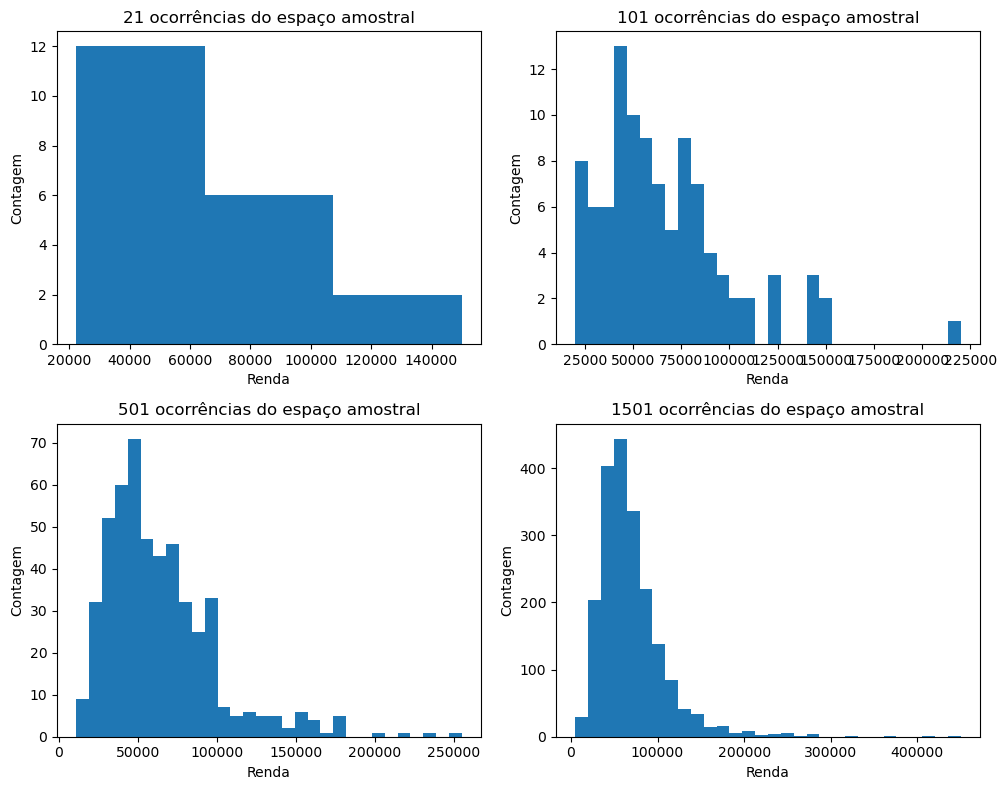

In [194]:
#Definindo o intervalo de cada gráfico. À medida em que aumentamos o espaço amostral do gráfico, a distribuição dos dados se aproxima da distribuição normal.
x1 = df_grades_new[0:20].values
x2 = df_grades_new[0:100].values
x3 = df_grades_new[0:500].values
x4 = df_grades_new[0:2000].values

#Criando grade com os 4 gráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#Primeiro gráfico
axs[0, 0].hist(x1, bins=3)
axs[0, 0].set_title('21 ocorrências do espaço amostral')
axs[0, 0].set_xlabel('Renda')
axs[0, 0].set_ylabel('Contagem')


#Segundo gráfico
axs[0, 1].hist(x2, bins = 30)
axs[0, 1].set_title('101 ocorrências do espaço amostral')
axs[0, 1].set_xlabel('Renda')
axs[0, 1].set_ylabel('Contagem')

#Terceiro gráfico
axs[1, 0].hist(x3, bins = 30)
axs[1, 0].set_title('501 ocorrências do espaço amostral')
axs[1, 0].set_xlabel('Renda')
axs[1, 0].set_ylabel('Contagem')

#Quarto gráfico
axs[1, 1].hist(x4, bins = 30)
axs[1, 1].set_title('1501 ocorrências do espaço amostral')
axs[1, 1].set_xlabel('Renda')
axs[1, 1].set_ylabel('Contagem')


plt.tight_layout()
plt.show()



2 member_id: Para identificar o mutuário que solicitou o empréstimo.

3 load_amnt: O valor listado do empréstimo solicitado pelo mutuário.

5 term: O número de pagamentos do empréstimo. Os valores estão em meses e podem ser 36 ou 60.

6 int_rate: Taxa de juros do empréstimo

7 installment: O pagamento mensal devido pelo mutuário se o empréstimo for originado.

8 grade: Grau de empréstimo atribuído ao LC que depende da pontuação de crédito do mutuário.

9 sub_grade: Subclasse de empréstimo atribuído a LC

10 emp_title : O cargo fornecido pelo Mutuário ao solicitar o empréstimo.

11 emp_length : Duração do emprego em anos. Os valores possíveis estão entre 0 e 10, onde 0 significa menos de um ano e 10 significa dez ou mais anos.

12 home_ownership: O status de propriedade da casa fornecido pelo mutuário durante o registro ou obtido no relatório de crédito. Nossos valores são: ALUGUEL, PRÓPRIO, HIPOTECA, OUTROS

13 anual_inc: A renda anual autodeclarada fornecida pelo mutuário durante o registro.

14 verification_status: Indica se a renda foi verificada por LC, não verificada, ou se a fonte de renda foi verificada

15 issue_d: O mês em que o empréstimo foi financiado

16 loan_status: Status atual do empréstimo

18 title: Explicando a ‘finalidade’ do empréstimo.

19 dti: A razão dívida / rendimento é  entre quanto o mutuário deve todos os meses e o rendimento do mutuário todos os meses.

20 delinq_2yrs: O número de inadimplências (parcelas atrasadas) do mutuário nos últimos 2 anos.

21 early_cr_line : o mês/ano em que a primeira linha de crédito informada do mutuário foi aberta

22 inq_last_6mths: Consultas sobre empréstimos feitos pelo mutuário nos últimos 6 meses.

23 mths_since_last_delinq: Meses que se passaram desde a última vez que o mutuário perdeu o pagamento pontual da parcela.

24 open_acc: O número de linhas de crédito abertas no arquivo de crédito do mutuário.

25 pub_rec Número de registros públicos depreciativos

26 revol_bal: Saldo rotativo de crédito total

27 revol_util : Taxa de utilização da linha rotativa ou a quantidade de crédito que o mutuário está usando em relação a todo o crédito rotativo disponível.

28 total_acc: O número total de linhas de crédito atualmente no arquivo de crédito do mutuário

29 inicial_list_status: O status de listagem inicial do empréstimo. Os valores possíveis são – W (inteiro), F (fracionário)

30 out_prncp: Principal pendente restante para o valor total financiado

31 total_pymnt : Pagamentos recebidos até o momento pelo valor total financiado.

32 total_rec_prncp: Principal recebido até a data.

33 total_rec_int Juros recebidos até o momento.

34 total_rec_late_fee : Taxas atrasadas recebidas até o momento.

35 recuperações: Total de procedimentos de recuperação iniciados contra o mutuário.

36 collection_recovery_fee : As taxas cobradas durante os procedimentos de recuperação.

37 last_pymnt_d O último mês em que o pagamento foi recebido.

38 last_pymnt_amnt: O último valor do pagamento recebido.

39 next_pymnt_d: Próxima data de pagamento agendada.

40 last_credit_pull_d: O mês mais recente que LC retirou crédito para este empréstimo

42 mths_since_last_major_derog: meses desde a inadimplência de 90 dias mais recente ou classificação pior

43 application_type: Indica se o empréstimo é um pedido individual ou um pedido conjunto com dois co-mutuários

44 anual_inc_joint: A renda anual combinada autodeclarada fornecida pelos co-mutuários durante o registro

45 dti_joint : Um índice calculado usando o total de pagamentos mensais dos co-mutuários sobre o total das obrigações da dívida, excluindo hipotecas e o empréstimo em ML solicitado, dividido pela renda mensal combinada declarada pelos co-mutuários

46 acc_now_delinq: O número de contas nas quais o mutuário está inadimplente

47 tot_coll_amt: Valores totais de cobrança já devidos pelo mutuário

48 tot_cur_bal: Saldo atual total de todas as contas de propriedade do mutuário

49 total_rev_hi_lim : Total de crédito alto/limite de crédito